#### Importing dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 100)

#### Assinging path to all the csv files

In [2]:
PATH_ALL = './assignment5/'
PATH_BEIJING = PATH_ALL + 'Beijing.csv'
PATH_CHENGDU = PATH_ALL + 'Chengdu.csv'
PATH_GUANGZHOU = PATH_ALL + 'Guangzhou.csv'
PATH_SHANGHAI = PATH_ALL + 'Shanghai.csv'
PATH_SHENYANG = PATH_ALL + 'Shenyang.csv'

#### Read csv files into dataframes
Each city has it's own dataframe, I added a 'loc' field which gives location name additionally for personal clarity.

In [3]:
df_beijing = pd.read_csv(PATH_BEIJING)
df_beijing['loc'] = 'Beijing'

df_chengdu = pd.read_csv(PATH_CHENGDU)
df_chengdu['loc'] = 'Chengdu'

df_guanghzou = pd.read_csv(PATH_GUANGZHOU)
df_guanghzou['loc'] = 'Guangzhou'

df_shanghai = pd.read_csv(PATH_SHANGHAI)
df_shanghai['loc'] = 'Shanghai'

df_shenyang = pd.read_csv(PATH_SHENYANG)
df_shenyang['loc'] = 'Shenyang'

Set index to dates 

In [4]:
df_shanghai.set_index(pd.to_datetime(df_shanghai[["year","month","day","hour"]]), inplace=True)

### **1.2 Visulaizations**

#### **1.2 - 1**

Line chart of temperature for Shanghai:

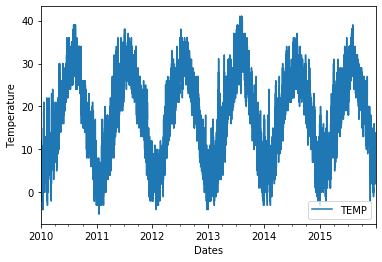

In [5]:
df_shanghai_temp = df_shanghai
df_shanghai_temp = df_shanghai_temp.filter(['TEMP'])
df_shanghai_temp.head(100000).plot();
plt.xlabel('Dates');
plt.ylabel('Temperature');

Yes, there's a noticeable pattern! We can tell the increase of temperature around the summer and dip of temperature during the winters are considerably similar for years 2010 - 2015. 2013's summer had it warmer than other years.

#### **1.2 - 2**

Boxplot of aggregated temperature values by month. I made a pivot table with values as temperature, index as month and added an aggregate function, which I used to plot.

In [6]:
months = {
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec'
}

TEMP    AxesSubplot(0.1,0.15;0.8x0.75)
dtype: object

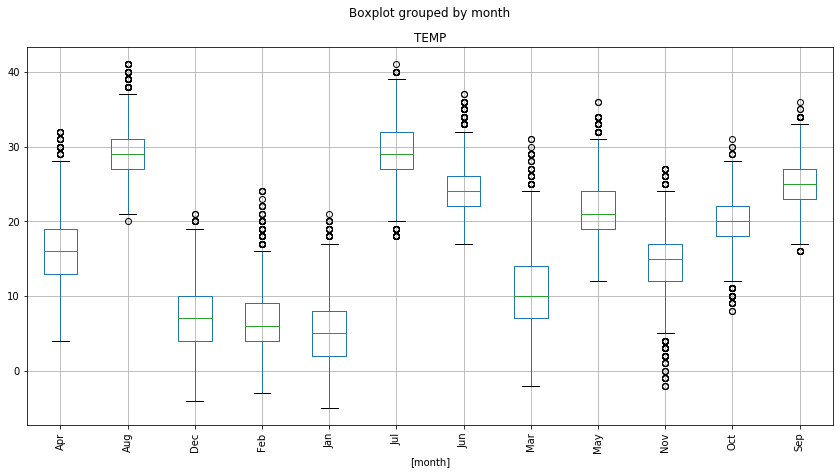

In [7]:
df_shanghai_temp = df_shanghai.filter(['TEMP','month'])
df_shanghai_temp['month'] = [months[x] for x in df_shanghai_temp['month']]
df_shanghai_temp.boxplot(return_type='axes', figsize=(14,7), rot=90, by='month')

#### **1.2 - 3**

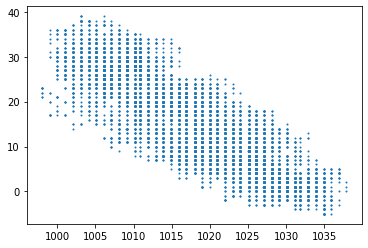

In [8]:
plt.scatter(df_shanghai['PRES'].head(10000), df_shanghai['TEMP'].head(10000), s=1);

From this plot, we see that, as temperature increases pressure decreases.

#### **1.2 - 4**

PM over time, I chose a smaller time span where we can observe the colors better (2010 - 2013)

For some reason, labels isn't working:

- green: beijing
- orange:shanghai
- red: shenyang
- purple: guanghzou
- brown: chengdu

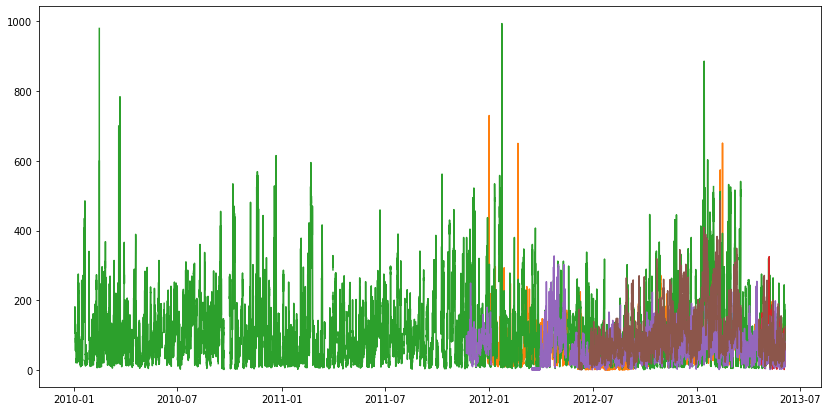

In [9]:
fig, ax = plt.subplots(figsize=(14, 7))
ax.plot((pd.to_datetime(df_shanghai[["year","month","day","hour"]])).head(30000), df_shanghai['PM'].head(30000), 'C1', label='Shanghai');
ax.plot((pd.to_datetime(df_beijing[["year","month","day","hour"]])).head(30000), df_beijing['PM'].head(30000), 'C2', label='Beijing');
ax.plot((pd.to_datetime(df_shenyang[["year","month","day","hour"]])).head(30000), df_shenyang['PM'].head(30000), 'C3', label='Shenyang');
ax.plot((pd.to_datetime(df_guanghzou[["year","month","day","hour"]])).head(30000), df_guanghzou['PM'].head(30000), 'C4', label='Guanghzou');
ax.plot((pd.to_datetime(df_chengdu[["year","month","day","hour"]])).head(30000), df_chengdu['PM'].head(30000), 'C5', label='Chengdu');